In [1]:
library(ggplot2)
library(tibble)
library(dplyr,warn.conflicts=FALSE)

# Laboratory Session : March 24, 2022

## Alessandro Zanoli
## id: 2057447


### Exercise 1 - vectors and data frames
•The following table gives the volume, area, length and maximum and mean depths of some Scottish lakes. Create vectors, holding the lake’s name and all the parameters and build a dataframe called `scottish.lakes` from the vectors.

1. evaluate the highest and lowest volume and area lake
2. order the frame with respect to the area and determine the two largest area lakes
3. by summing up the areas occupied by the lakes, determine the area of Scotland covered by water

In [2]:
#1
lakes <- read.table("lakes.csv",header=T,sep=",")
lakes

Loch,Volume.km3.,Volume.mi3.,Area.km2.,Area.mi2.,Length.km.,Length.mi.,Max_depth.m.,Max_depth.ft.,Mean_depth.m.,Mean_depth.ft.
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>
Loch Ness,7.45,1.790,56.0,22.0,36.2,22.5,227,745,132.0,433
Loch Lomond,2.60,0.620,71.0,27.0,36.0,22.0,190,620,37.0,121
Loch Morar,2.30,0.550,26.7,10.3,18.8,11.7,310,1020,87.0,285
Loch Tay,1.60,0.380,26.4,10.2,23.0,14.0,150,490,60.6,199
Loch Awe,1.20,0.290,39.0,15.0,41.0,25.0,94,308,32.0,105
Loch Maree,1.09,0.260,28.6,11.0,20.0,12.0,114,374,38.0,125
Loch Ericht,1.08,0.260,18.6,7.2,23.0,14.0,156,512,57.6,189
Loch Lochy,1.07,0.260,16.0,6.2,16.0,9.9,162,531,70.0,230
Loch Rannoch,0.97,0.230,19.0,7.3,15.7,9.8,134,440,51.0,167


In [3]:
lakes[order(lakes$Area.km2.,decreasing=TRUE),][1,] # max

,Loch,Volume.km3.,Volume.mi3.,Area.km2.,Area.mi2.,Length.km.,Length.mi.,Max_depth.m.,Max_depth.ft.,Mean_depth.m.,Mean_depth.ft.
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>
2,Loch Lomond,2.6,0.62,71,27,36,22,190,620,37,121


In [4]:
lakes[order(lakes$Area.km2.),][1,] # min

,Loch,Volume.km3.,Volume.mi3.,Area.km2.,Area.mi2.,Length.km.,Length.mi.,Max_depth.m.,Max_depth.ft.,Mean_depth.m.,Mean_depth.ft.
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>
11,Loch Katrine,0.77,0.18,12.4,4.8,12.9,8,151,495,43.4,142


In [5]:
#2
lakes[order(lakes$Area.km2.,decreasing=TRUE),][1:2,] # 2 largest area lakes

,Loch,Volume.km3.,Volume.mi3.,Area.km2.,Area.mi2.,Length.km.,Length.mi.,Max_depth.m.,Max_depth.ft.,Mean_depth.m.,Mean_depth.ft.
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>
2,Loch Lomond,2.60,0.62,71,27,36.0,22.0,190,620,37,121
1,Loch Ness,7.45,1.79,56,22,36.2,22.5,227,745,132,433


In [6]:
#3
sum(lakes$Area.km2.) # total area occupied by lakes

[1] 371.7

### Exercise 2 - Crude Oil Production
The following CSV file
https://drive.google.com/file/d/13WkinYhJNSr_XCldb3wpZOI0fgjer7Iw/view contains data on crude oil prices from 1861 to 2020, measured in US dollars per barrel.

1. Write R code that is able to read the file and import it in a data frame structure. (Hint: before loading the file, open it with a text editor and check its structure).
2. produce a plot with the Oil price as a function of the year
3. which is the highest price in history ? When did it occur ?
4. plot the derivative of the curve, simply evaluated with the finite difference formula (forward derivative):
$$
\frac{\partial price}{\partial year} = price_{j+1} - price_{j}
$$

In [7]:
#1
oil <- read.table("crude-oil-prices.csv",header=T,sep=',')
colnames(oil)[length(colnames(oil))] <- "Price"
head(oil)

,Entity,Code,Year,Price
,<chr>,<chr>,<int>,<dbl>
1,World,OWID_WRL,1861,0.49
2,World,OWID_WRL,1862,1.05
3,World,OWID_WRL,1863,3.15
4,World,OWID_WRL,1864,8.06
5,World,OWID_WRL,1865,6.59
6,World,OWID_WRL,1866,3.74


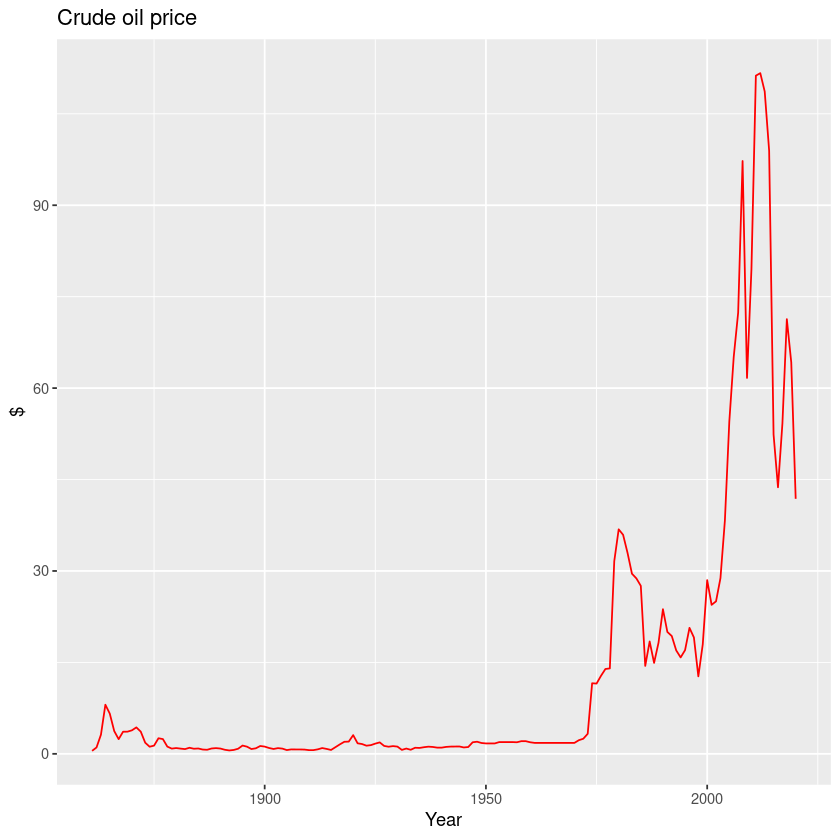

In [8]:
#2
p1 <- ggplot(oil,aes(x=Year,y=Price)) + geom_line(color='red') + labs(title='Crude oil price',y='$')
p1

In [9]:
#3
oil[order(oil$Price,decreasing=TRUE),][1,] # get the row corresponding to the maximum oil price

,Entity,Code,Year,Price
,<chr>,<chr>,<int>,<dbl>
152,World,OWID_WRL,2012,111.6697


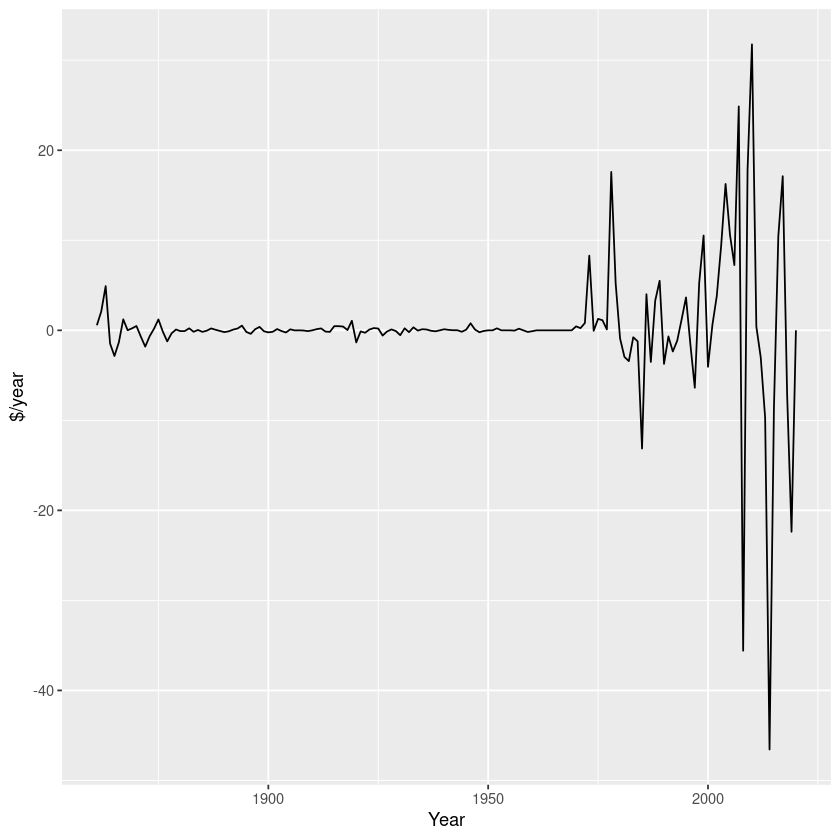

In [10]:
#4
oil['derivative'] <- vector(length = nrow(oil))

for (i in 1:(nrow(oil)-1)){
    oil$derivative[i] <- oil$Price[i+1] - oil$Price[i]
}

p2 <- ggplot(oil,aes(x=Year,y=derivative)) + geom_line() + labs(y='$/year')
p2


### Exercise 3 - World Coal Production

The following CSV file
https://drive.google.com/file/d/1U1hK5o_d3vl8twwGaRJNcDJ79O9I5zJ1/view?usp=sharing contains data on the coal production (in TW ·hour) for several countries in the World.

1. Write R code that is able to read the file and import it in a tibble [4] structure
2. count the number of countries available in the file and produce a barplot with the number of entries
for each country
for the following items select only the years ≥1970:
3. selecting only the year after 1970, determine the total integrated production for each country and print the top 5 Countries with highest coal productions
4. for the 5 top Countries, create a plot of production as a function of time
5. generate a plot with the cumulative sum of the World’s coal production over the years

In [11]:
#1
coal <- as_tibble(read.csv("coal-production-by-country.csv"))
colnames(coal)[4]<-"TWh"

#2
length(unique(coal$Code)) # number of countries

[1] 177

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


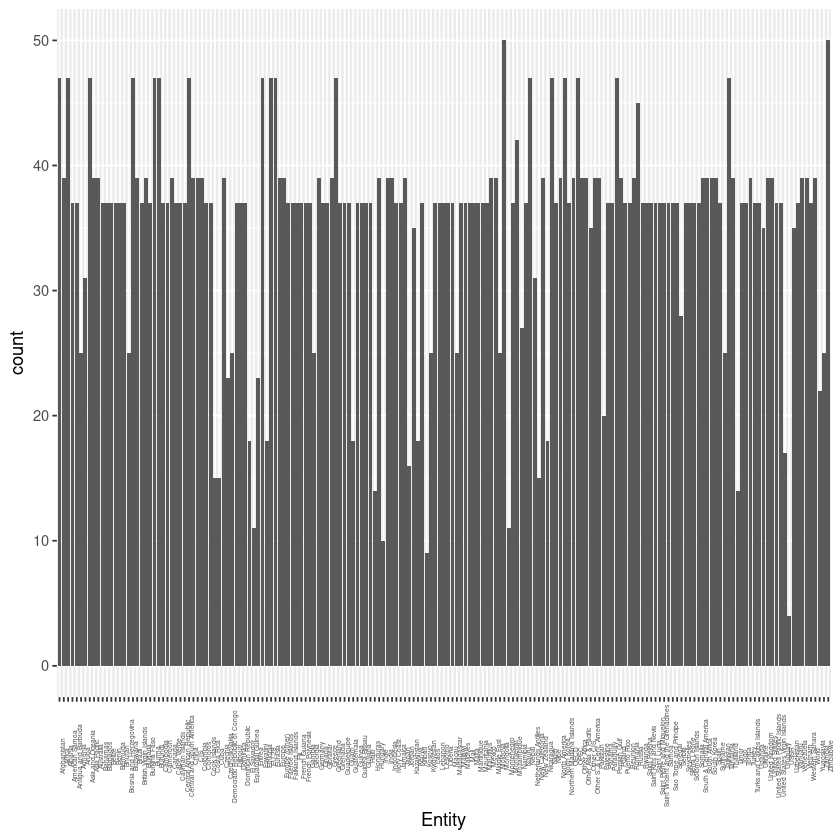

In [12]:
p1 <- ggplot(subset(coal, Year >= 1970),aes(x=Entity)) + geom_histogram(stat="count") + theme(axis.text.x = element_text(size=4,angle=90))
print(p1)

In [13]:
# 3
sum_coal<-aggregate(subset(coal,coal$Year>=1970)$TWh, by=list(Entity=subset(coal,coal$Year>=1970)$Entity),FUN=sum)
head(sum_coal[order(sum_coal$x, decreasing=TRUE),],20)

,Entity,x
,<chr>,<dbl>
176,World,1260113.24
9,Asia Pacific,690240.47
8,Asia and Oceania,685960.04
32,China,459564.65
120,OECD,438441.38
117,North America,244443.42
166,United States,226068.84
51,Eurasia,161580.48
50,EU-28,150743.35


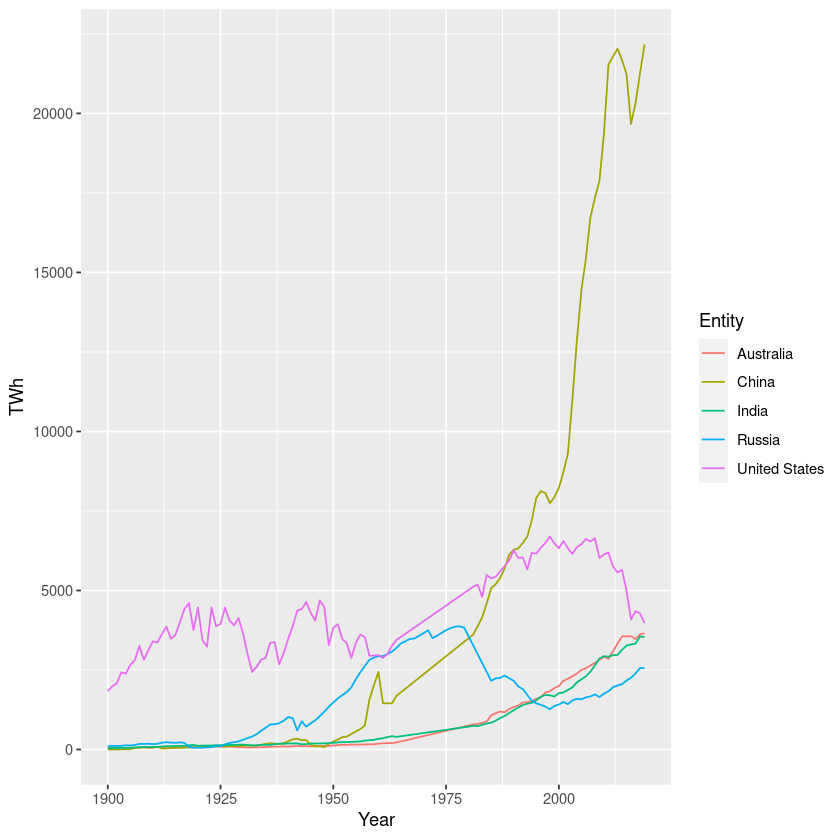

In [14]:
#4
top_countries <- c("China","United States","Russia","Australia","India")
only_top <- subset(coal,coal$Entity %in% top_countries)
p2 <- ggplot(only_top,aes(x=Year,y=TWh,group=Entity,color=Entity)) 
p2 <- p2 + geom_line()
p2

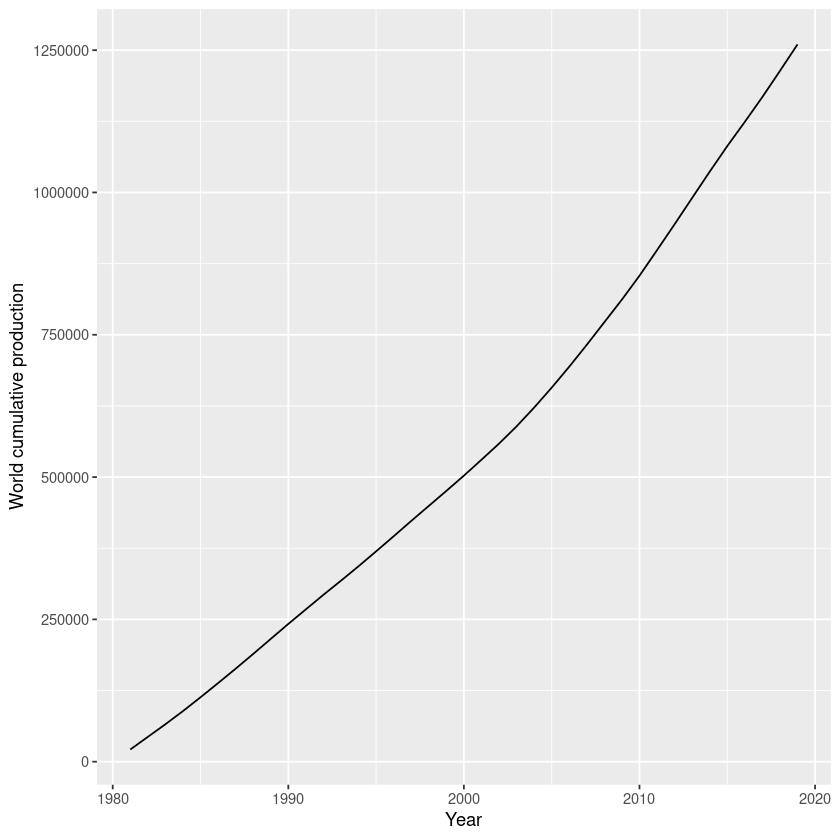

In [15]:
#5
world_production <- subset(coal,coal$Entity == 'World')
world_production['Cumulative'] = cumsum(world_production['TWh'])
p3 <- ggplot(world_production,aes(x=Year,y=Cumulative)) + geom_line() + labs(y='World cumulative production')
p3



### Exercise 4 - Covid19 Vaccine data

The file vaccinationsby-manufacturer.csv, (https://github.com/owid/covid-19-data/blob/master/public/data/vaccinations/vaccinations-by-manufacturer.csv) contains a summary on the vaccination data grouped by Vaccine type and Country.

1. filter() the original tibble by selecting the following countries: Italy
2. plot the number of vaccines given as a function of time for the different vaccine manufacturer
3. from the same tibble plot the total number of vaccines shot per day in Italy
4. do the same exercise for the following countries: Germany and United States of America

In [24]:
# 1
vac1 <- as_tibble(read.csv("vaccinations-by-manufacturer.csv"))
vac1 <- mutate(vac1,date= as.Date(date, format= "%Y-%m-%d"))
it_vac1 <- filter(vac1,location=='Italy')


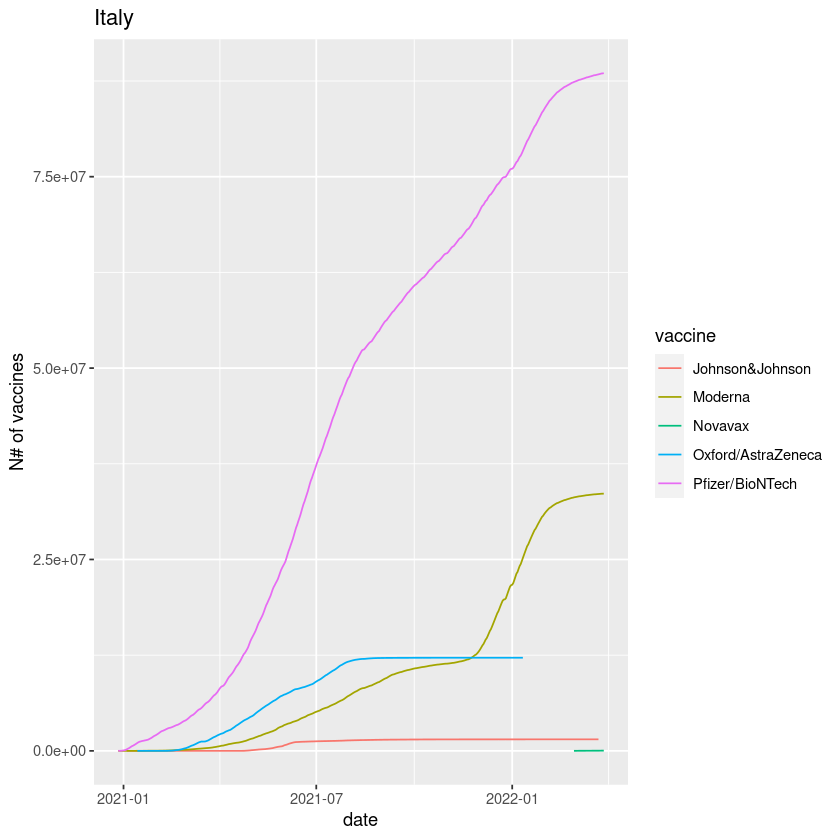

In [36]:
#2
p1 <- ggplot(it_vac1,aes(x=date,y=total_vaccinations,group=vaccine,color=vaccine)) + geom_line() + labs(y="N# of vaccines",title="Italy")
p1

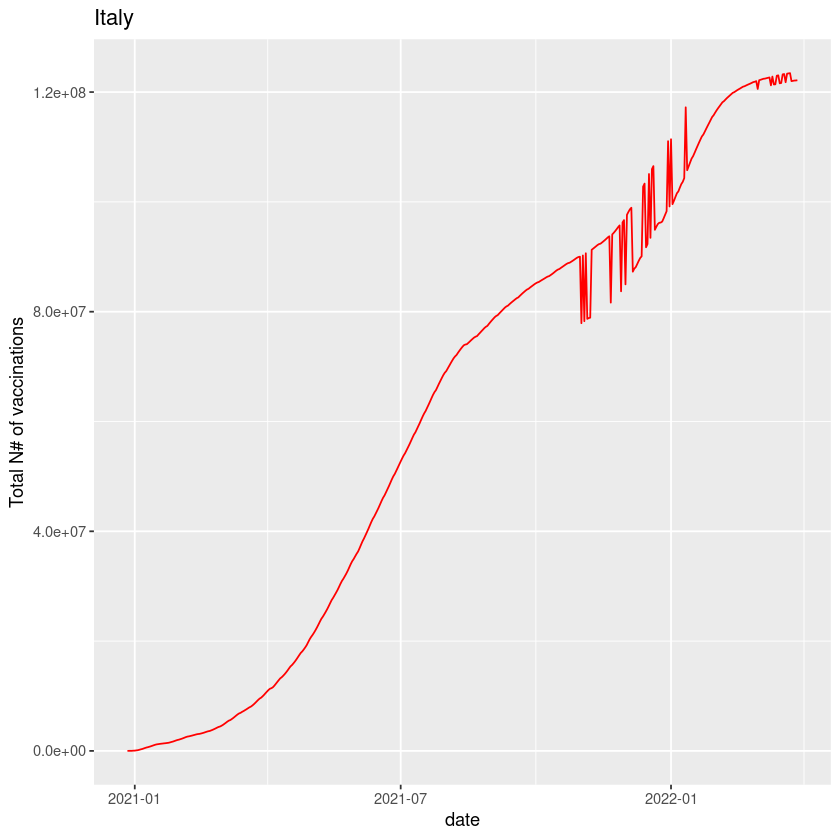

In [37]:
#3
total_it_vac1 <- aggregate(it_vac1$total_vaccinations,by=list(date=it_vac1$date),FUN=sum)
p2 <- ggplot(total_it_vac1,aes(x=date,y=x)) + geom_line(color='red') + labs(y='Total N# of vaccinations',title='Italy')
p2

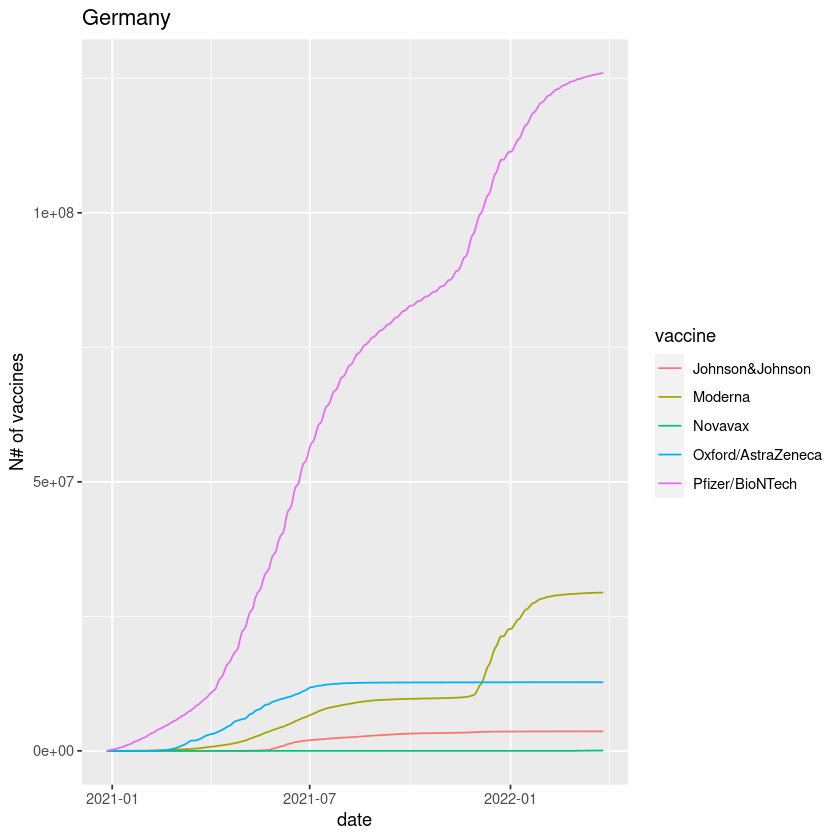

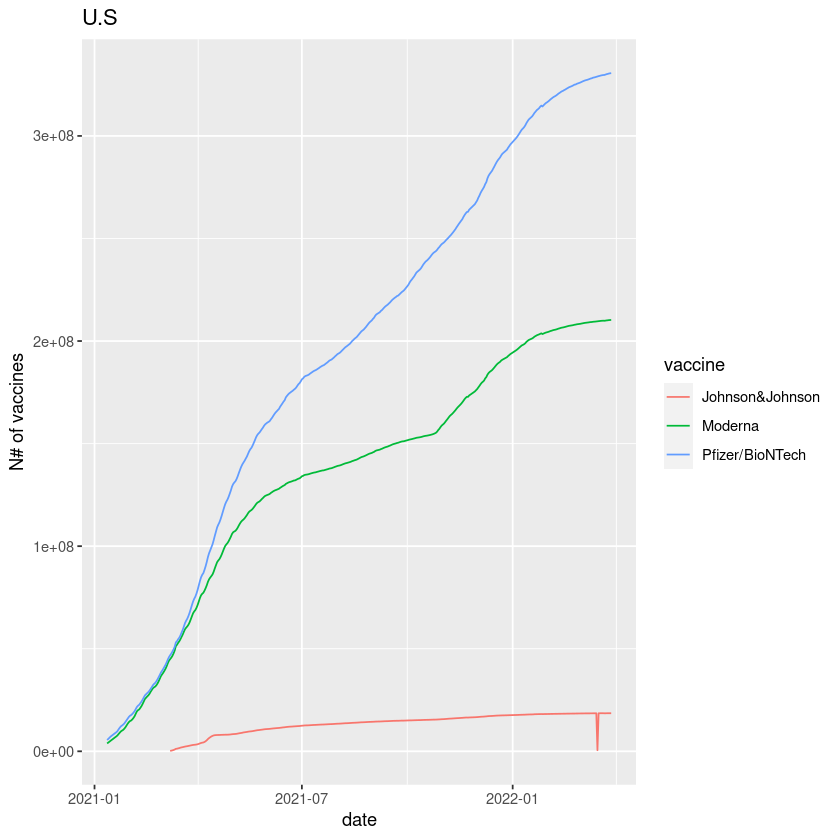

In [43]:
#4
de_vac1 <- filter(vac1,location=='Germany')
us_vac1 <- filter(vac1,location=='United States')

p1de <- ggplot(de_vac1,aes(x=date,y=total_vaccinations,group=vaccine,color=vaccine)) + geom_line() + labs(y="N# of vaccines",title="Germany")
p1us <- ggplot(us_vac1,aes(x=date,y=total_vaccinations,group=vaccine,color=vaccine)) + geom_line() + labs(y="N# of vaccines",title="U.S")

print(p1de)
print(p1us)


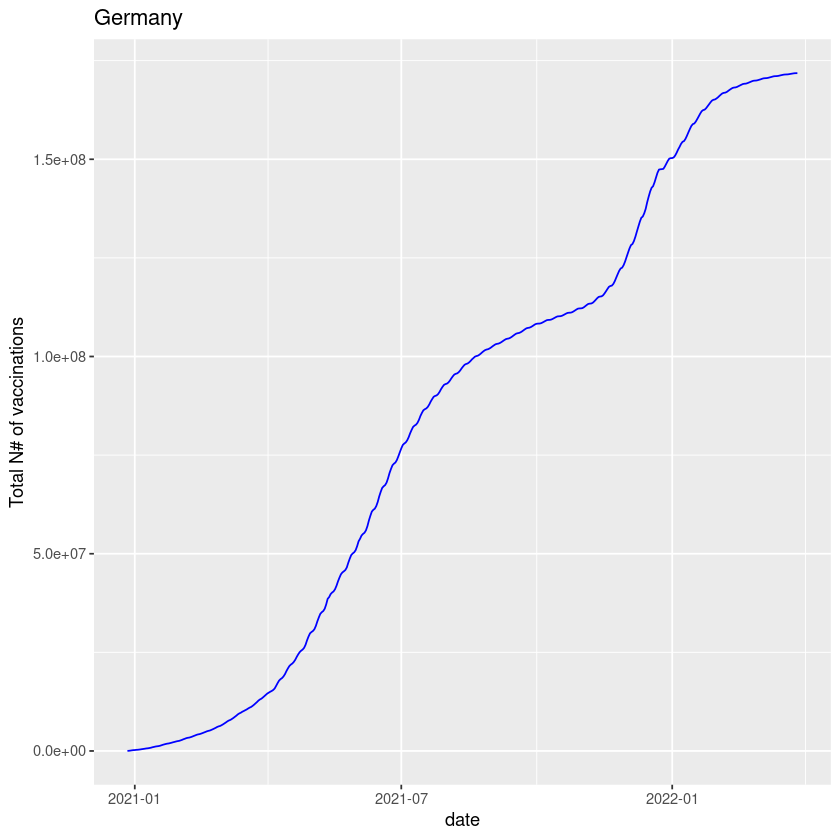

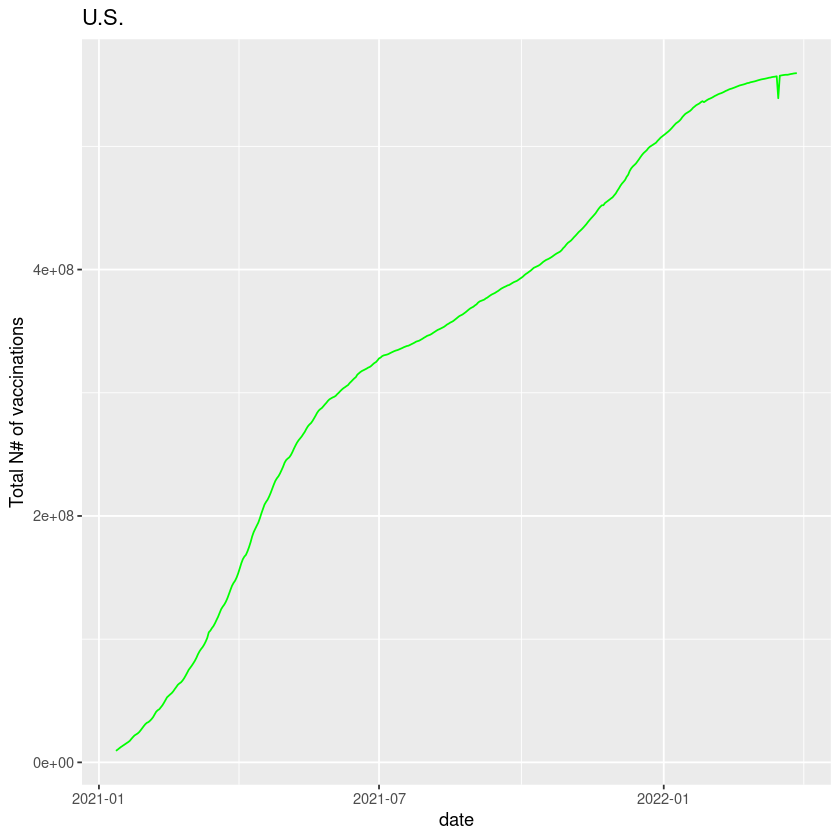

In [47]:
total_de_vac1 <- aggregate(de_vac1$total_vaccinations,by=list(date=de_vac1$date),FUN=sum)
total_us_vac1 <- aggregate(us_vac1$total_vaccinations,by=list(date=us_vac1$date),FUN=sum)
p2de <- ggplot(total_de_vac1,aes(x=date,y=x)) + geom_line(color='blue') + labs(y='Total N# of vaccinations',title='Germany')
p2us <- ggplot(total_us_vac1,aes(x=date,y=x)) + geom_line(color='green') + labs(y='Total N# of vaccinations',title='U.S.')
print(p2de)
print(p2us)

The file vaccinations.csv, (https://github.com/owid/covid-19-data/blob/master/public/data/vaccinations/vaccinations.csv) contains country-by-country data on global COVID-19 vaccinations. The dataset includes some subnational locations (England, Northern Ireland, Scotland, Wales, . . .) and international aggregates (World, continents, European Union ldots). They
can be identified by their iso code that starts with OWID
1. selecting all the European countries in the tibble, plot the number of daily vaccinations per million
as a function of date
2. study the data structure and produce few relevant plots of your taste

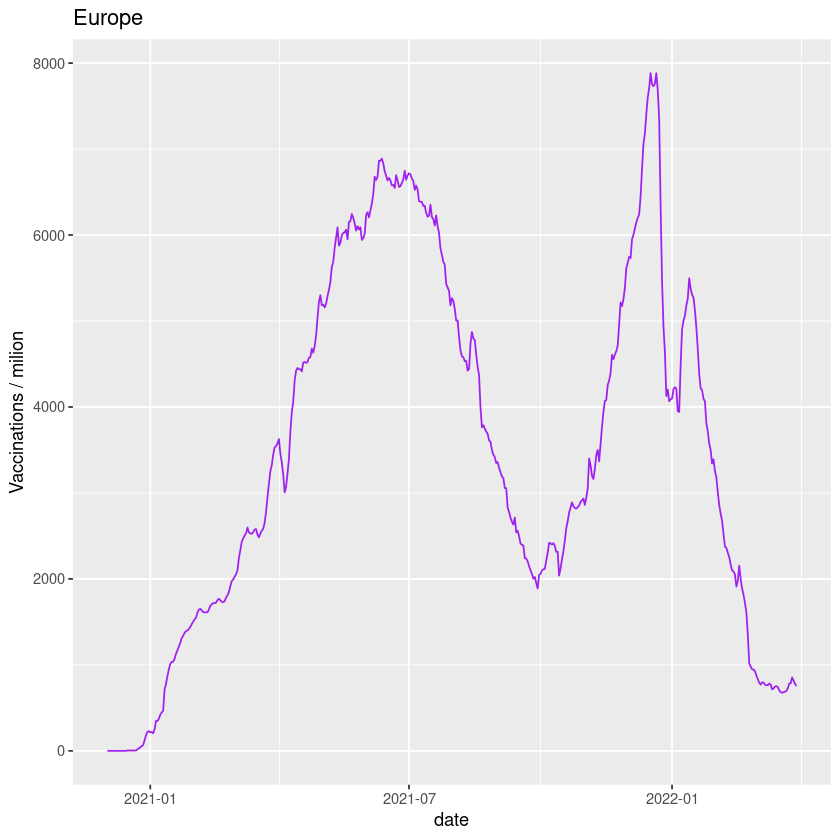

In [88]:
# 1
vac_world <- as_tibble(read.csv("vaccinations.csv"))
vac_world <- mutate(vac_world,date= as.Date(date, format= "%Y-%m-%d"))
vac_europe <- filter(vac_world,vac_world$iso_code == 'OWID_EUR')
p1 <- ggplot(vac_europe,aes(x=date,y=daily_vaccinations_per_million)) + geom_line(color='purple') + labs(y='Vaccinations / milion',title='Europe')
p1


In [105]:
#2 
# let's see what kind of data is provided
colnames(vac_world)

[1] "location"                            "iso_code"                           
 [3] "date"                                "total_vaccinations"                 
 [5] "people_vaccinated"                   "people_fully_vaccinated"            
 [7] "total_boosters"                      "daily_vaccinations_raw"             
 [9] "daily_vaccinations"                  "total_vaccinations_per_hundred"     
[11] "people_vaccinated_per_hundred"       "people_fully_vaccinated_per_hundred"
[13] "total_boosters_per_hundred"          "daily_vaccinations_per_million"     
[15] "daily_people_vaccinated"             "daily_people_vaccinated_per_hundred"

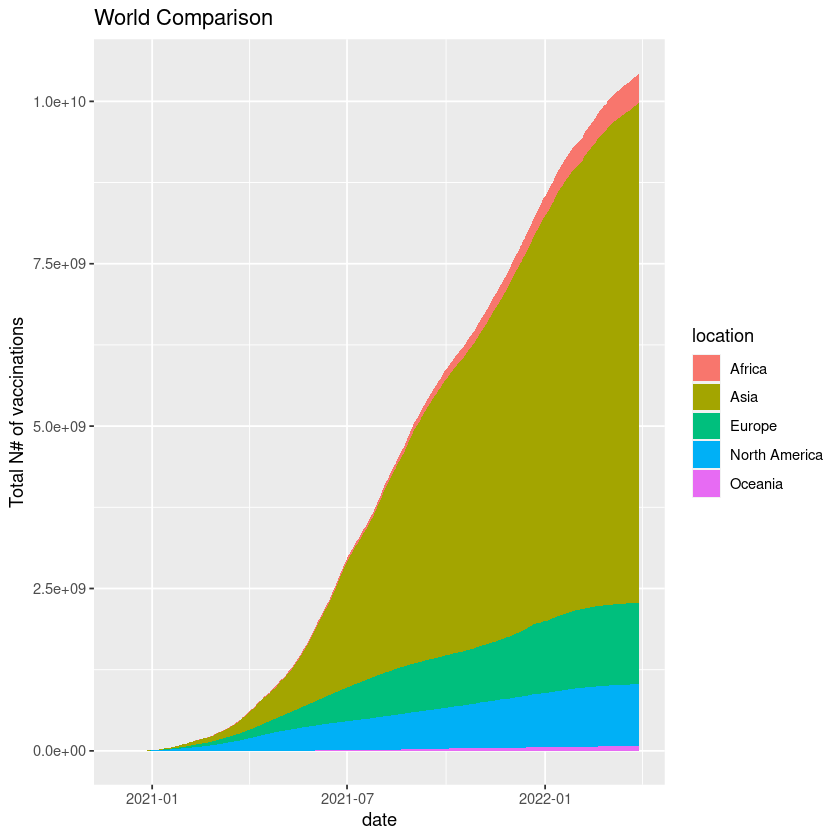

In [107]:
vac_part<-filter(vac_world,iso_code %in% c('OWID_EUR','OWID_NAM','OWID_OCE','OWID_ASI','OWID_AFR'))
p3 <- ggplot(vac_part,aes(x=date,y=total_vaccinations,fill=location)) + geom_area() + labs(y='Total N# of vaccinations',title='World Comparison')
p3

Warning message:
“Removed 1 row(s) containing missing values (geom_path).”


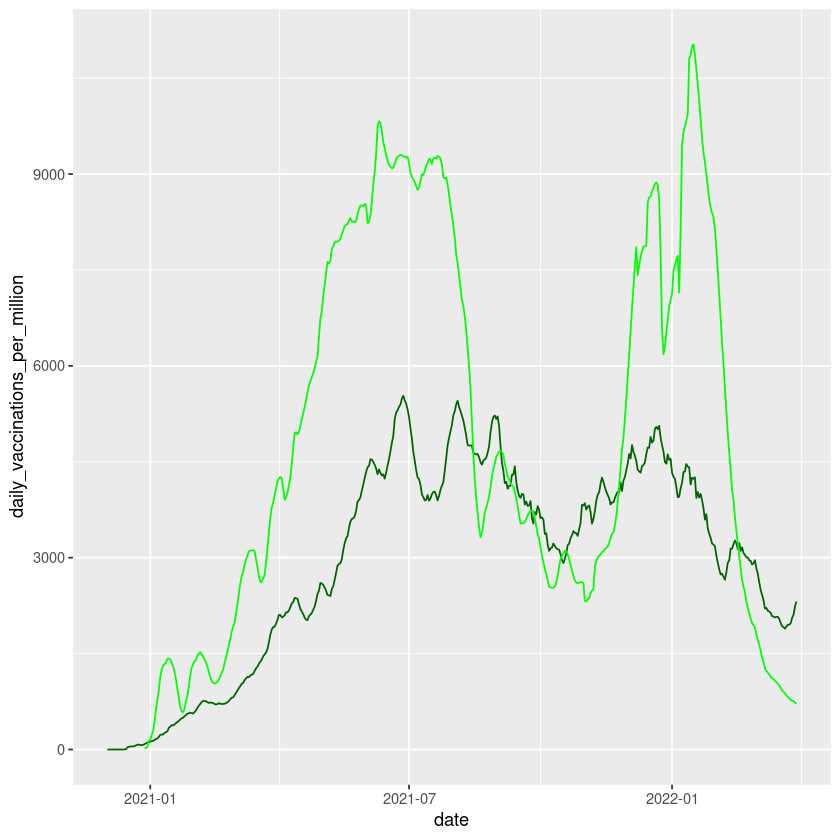

In [119]:
vac_only_world <- filter(vac_world, iso_code == 'OWID_WRL')
vac_only_italy <- filter(vac_world,iso_code =='ITA')

p4 <- ggplot(vac_only_world,aes(x=date,y=daily_vaccinations_per_million,colour=iso_code)) + geom_line(color='darkgreen') + geom_line(data=vac_only_italy,color='green')
p4